In [6]:
import numpy as np

In [7]:
beta = -20

mu_a = 2.0
mu_b = 1.0
mu_c = 0.1
mu_d = 3.0
mu_e = 8.0

sigma_a = 10.0
sigma_b = 22.0
sigma_c = 33.0
sigma_d = 51.0
sigma_e = 1.0

In [8]:
def sample_leaf(mu, sigma):
    return np.random.normal(mu, sigma**(0.5))

In [9]:
def sample_inner(mu, sigma, beta, b_down):
    return np.random.normal(mu + beta*b_down, sigma**(0.5))

In [10]:
def sample():
    a = sample_leaf(mu_a, sigma_a)
    b = sample_leaf(mu_b, sigma_b)
    c = sample_leaf(mu_c, sigma_c)

    d = sample_inner(mu_d, sigma_d, beta, a)
    e = sample_inner(mu_e, sigma_e, beta, d)

    return {
        "a": a,
        "b": b,
        "c": c,
        "d": d,
        "e": e,
    }

In [11]:
samples = [sample() for _ in range(500_000)]

<Axes: >

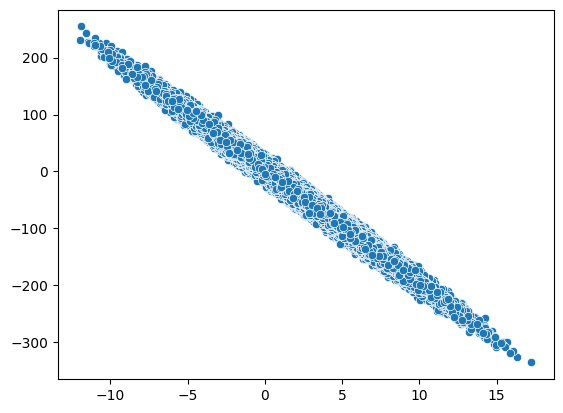

In [12]:
import seaborn as sns

sns.scatterplot(x=[s["a"] for s in samples], y=[s["d"] for s in samples])

In [13]:
1 / len(samples) * sum(s["a"] for s in samples)

1.9953128810337402

In [14]:
1 / len(samples) * sum(s["e"] - beta * s["d"] for s in samples)

8.001053904071581

In [79]:
def var(var):
    mean = 1 / len(samples) * sum(s_[var] - beta * s_[var] for s_ in samples)
    return 1 / len(samples) * sum((s_[var] - mean)**2 for s_ in samples)

var("d")

551522.9774201011

In [80]:
def var(var):
    return 1 / len(samples) * sum((s_[var] - mu_e - beta*s_["d"])**2 for s_ in samples)

var("e")

0.9992533831698454

In [81]:
sum(s["d"]*s["a"] - mu_d*s["a"] + s["e"]*s["d"] - mu_e*s["d"] for s in samples) / sum(s["a"]**2 + s["d"]**2 for s in samples)

-20.000020297256242

In [82]:
import numpy as np
import scipy as sp

In [83]:
b = np.array([
    sum(s["a"]*s["d"] + s["d"]*s["e"] for s in samples) / sum(s["a"]**2 + s["d"]**2 for s in samples),
    1/len(samples) * sum(s["a"] for s in samples),
    1/len(samples) * sum(s["b"] for s in samples),
    1/len(samples) * sum(s["c"] for s in samples),
    1/len(samples) * sum(s["d"] for s in samples),
    1/len(samples) * sum(s["e"] for s in samples),
])

In [84]:
A = np.array(
    [
        [
            1,
            0,
            0,
            0,
            sum(s["a"] for s in samples)
            / sum(s["a"] ** 2 + s["d"] ** 2 for s in samples),
            sum(s["d"] for s in samples)
            / sum(s["a"] ** 2 + s["d"] ** 2 for s in samples),
        ],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [1 / len(samples) * sum(s["a"] for s in samples), 0, 0, 0, 1, 0],
        [1 / len(samples) * sum(s["d"] for s in samples), 0, 0, 0, 0, 1],
    ]
)

In [85]:
np.linalg.solve(A, b)

array([-20.00000615,   1.999117  ,   1.00244174,   0.0971161 ,
         2.98713096,   8.00138706])

In [68]:
mean = 1 / len(samples) * sum(s["c"] for s in samples)
1 / len(samples) * sum((s["c"] - mean) ** 2 for s in samples)

33.02147645331654

Var: $$(b - \mu - \beta*b_d)^2$$

In [69]:
1 / len(samples) * sum((s["d"] - 3.0 - 0.5*s["a"])**2 for s in samples)

138.5296104005663

In [70]:
1 / len(samples) * sum((s["e"] - 8.0 - 0.5*s["d"])**2 for s in samples)

576.0973475594348

[{'a': -1.4280220843425948,
  'b': 4.247127989355723,
  'c': -0.052365500404290714,
  'd': 27.003064342763114,
  'e': -532.4120032069725},
 {'a': 3.5425609997988494,
  'b': 5.439653462543246,
  'c': -2.244922197807064,
  'd': -69.65967515868846,
  'e': 1400.3967757251414},
 {'a': 3.9163011565138084,
  'b': 4.650226919225496,
  'c': -2.282490997150032,
  'd': -80.79284530573196,
  'e': 1623.8033013318272},
 {'a': 0.19933567098523122,
  'b': 1.4893310150121932,
  'c': -16.501424723359932,
  'd': -8.47351754066332,
  'e': 176.1960375833502},
 {'a': 3.460933799825355,
  'b': 6.559922840332713,
  'c': -1.6541767757478216,
  'd': -74.45041641668976,
  'e': 1497.7030116738792},
 {'a': -1.0574883942017226,
  'b': 6.2397014481384225,
  'c': -9.328357283485301,
  'd': 22.295070262311178,
  'e': -436.954625692588},
 {'a': 0.780747942496178,
  'b': 9.198220554013828,
  'c': 0.4616883000377792,
  'd': 0.2535060999299489,
  'e': 4.7277923464736755},
 {'a': 0.07347345736112643,
  'b': 1.5409202806589